In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal
from scipy import fftpack
from scipy import spatial

### Import dataset and describe

In [2]:
df_x = pd.read_csv(r"D:\Documents\Current work\Emotibit parsed data\2023-04-03_10-37-37-952046_GX.csv", sep=",")
df_y = pd.read_csv(r"D:\Documents\Current work\Emotibit parsed data\2023-04-03_10-37-37-952046_GY.csv", sep=",")
df_z = pd.read_csv(r"D:\Documents\Current work\Emotibit parsed data\2023-04-03_10-37-37-952046_GZ.csv", sep=",")

In [3]:
df_x

,LslMarkerSourceTimestamp,LslLocalTimestamp,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,GX
0,7804.269876,7804.269873,1.680515e+09,588524.000,28930,1,GX,1,100,0.122
1,7804.309876,7804.309873,1.680515e+09,588564.000,28949,2,GX,1,100,1.282
2,7804.349876,7804.349873,1.680515e+09,588604.000,28949,2,GX,1,100,-1.709
3,7804.389543,7804.389540,1.680515e+09,588643.667,28966,3,GX,1,100,-2.930
4,7804.429210,7804.429207,1.680515e+09,588683.333,28966,3,GX,1,100,0.122
...,...,...,...,...,...,...,...,...,...,...
19391,8574.394802,8574.394791,1.680515e+09,1358646.000,25120,3,GX,1,100,-2.686
19392,8574.434802,8574.434791,1.680515e+09,1358686.000,25120,3,GX,1,100,-0.366
19393,8574.470469,8574.470458,1.680515e+09,1358721.667,25137,3,GX,1,100,3.052
19394,8574.506135,8574.506124,1.680515e+09,1358757.333,25137,3,GX,1,100,4.608


In [4]:
print(df_x.describe())
# print("-------------------------")
# print(df_2.describe())
# print("-------------------------")
# print(df_3.describe())


       LslMarkerSourceTimestamp  LslLocalTimestamp  LocalTimestamp  \
count              19396.000000       19396.000000    1.939600e+04   
mean                8189.405466        8189.405459    1.680515e+09   
std                  222.377712         222.377709    2.223777e+02   
min                 7804.269876        7804.269873    1.680515e+09   
25%                 7996.840608        7996.840603    1.680515e+09   
50%                 8189.398339        8189.398332    1.680515e+09   
75%                 8381.970071        8381.970062    1.680515e+09   
max                 8574.541802        8574.541791    1.680515e+09   

       EmotiBitTimestamp  PacketNumber    DataLength  ProtocolVersion  \
count       1.939600e+04  19396.000000  19396.000000          19396.0   
mean        9.736581e+05  33024.634306      2.696638              1.0   
std         2.223769e+05  19183.495298      0.584452              0.0   
min         5.885240e+05     10.000000      1.000000              1.0   
25% 

In [5]:
print(df_x.info())
# print("-------------------------")
# print(df_2.info())
# print("-------------------------")
# print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19396 entries, 0 to 19395
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LslMarkerSourceTimestamp  19396 non-null  float64
 1   LslLocalTimestamp         19396 non-null  float64
 2   LocalTimestamp            19396 non-null  float64
 3   EmotiBitTimestamp         19396 non-null  float64
 4   PacketNumber              19396 non-null  int64  
 5   DataLength                19396 non-null  int64  
 6   TypeTag                   19396 non-null  object 
 7   ProtocolVersion           19396 non-null  int64  
 8   DataReliability           19396 non-null  int64  
 9   GX                        19396 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 1.5+ MB
None


In [6]:
print(df_x.columns)
# print("-------------------------")
# print(df_2.columns)
# print("-------------------------")
# print(df_3.columns)

Index(['LslMarkerSourceTimestamp', 'LslLocalTimestamp', 'LocalTimestamp',
       'EmotiBitTimestamp', 'PacketNumber', 'DataLength', 'TypeTag',
       'ProtocolVersion', 'DataReliability', 'GX'],
      dtype='object')


### Define time in seconds

In [7]:
df_x['timestamp'] = df_x['LslMarkerSourceTimestamp']

In [12]:
df_y['timestamp'] = df_y['LslMarkerSourceTimestamp']
df_z['timestamp'] = df_z['LslMarkerSourceTimestamp']

In [8]:
df_x

,LslMarkerSourceTimestamp,LslLocalTimestamp,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,GX,timestamp
0,7804.269876,7804.269873,1.680515e+09,588524.000,28930,1,GX,1,100,0.122,7804.269876
1,7804.309876,7804.309873,1.680515e+09,588564.000,28949,2,GX,1,100,1.282,7804.309876
2,7804.349876,7804.349873,1.680515e+09,588604.000,28949,2,GX,1,100,-1.709,7804.349876
3,7804.389543,7804.389540,1.680515e+09,588643.667,28966,3,GX,1,100,-2.930,7804.389543
4,7804.429210,7804.429207,1.680515e+09,588683.333,28966,3,GX,1,100,0.122,7804.429210
...,...,...,...,...,...,...,...,...,...,...,...
19391,8574.394802,8574.394791,1.680515e+09,1358646.000,25120,3,GX,1,100,-2.686,8574.394802
19392,8574.434802,8574.434791,1.680515e+09,1358686.000,25120,3,GX,1,100,-0.366,8574.434802
19393,8574.470469,8574.470458,1.680515e+09,1358721.667,25137,3,GX,1,100,3.052,8574.470469
19394,8574.506135,8574.506124,1.680515e+09,1358757.333,25137,3,GX,1,100,4.608,8574.506135


In [18]:
dt = np.diff(df_3['timestamp'])

In [16]:
print(f"Average sample interval: {np.mean(dt):.6f} seconds")
print(f"Estimated sampling frequency: {1 / np.mean(dt):.2f} Hz")

Average sample interval: 0.009480 seconds
Estimated sampling frequency: 105.49 Hz


### Plot angular velocities

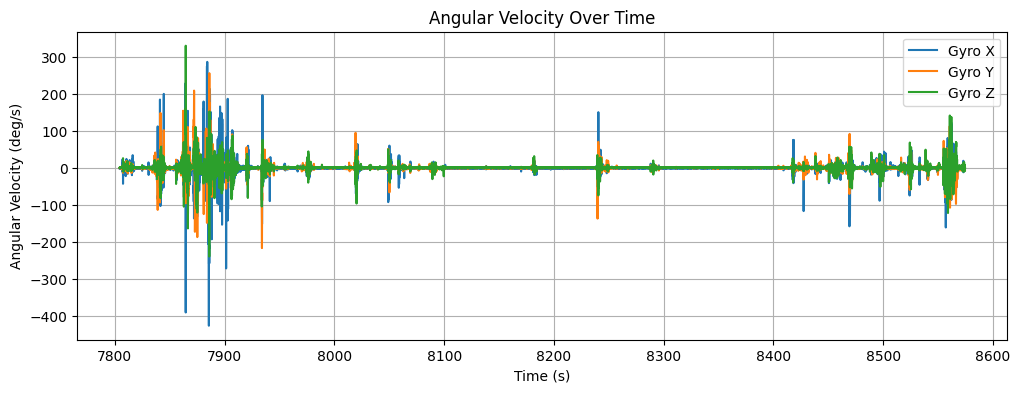

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(df_x['timestamp'], df_x['GX'], label='Gyro X')
plt.plot(df_y['timestamp'], df_y['GY'], label='Gyro Y')
plt.plot(df_x['timestamp'], df_z['GZ'], label='Gyro Z')
plt.title('Angular Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
df_gyro = pd.DataFrame({
    "timestamp": df_x["timestamp"].values,
    'GX': df_x['GX'].values,
    'GY': df_y['GY'].values,
    'GZ': df_z['GZ'].values
})

In [32]:
df_gyro['angular_speed'] = np.sqrt(df_gyro['GX']**2 +
                                   df_gyro['GY']**2 +
                                   df_gyro['GZ']**2)

### Head movement

In [25]:
peaks, _ = signal.find_peaks(df_gyro['angular_speed'], height=50)


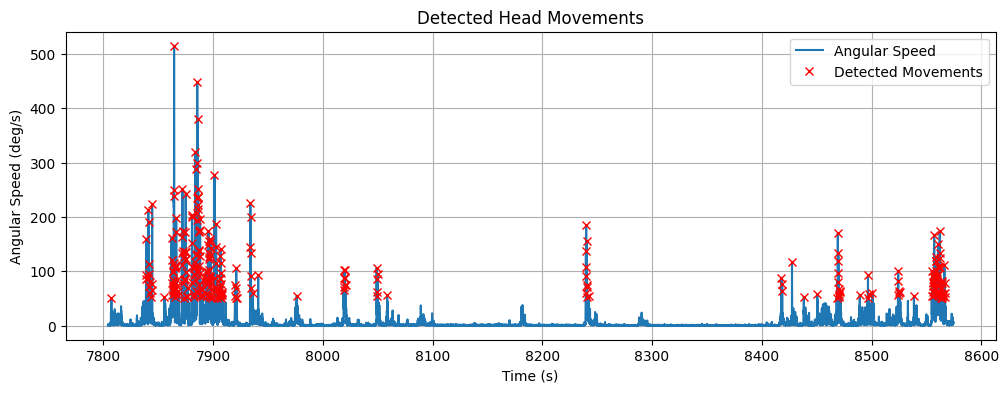

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(df_gyro['timestamp'], df_gyro['angular_speed'], label='Angular Speed')
plt.plot(df_gyro['timestamp'].iloc[peaks], df_gyro['angular_speed'].iloc[peaks], "rx", label="Detected Movements")
plt.title("Detected Head Movements")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (deg/s)")
plt.legend()
plt.grid(True)
plt.show()

#### Wrist orientation

In [27]:
df_gyro = pd.DataFrame({
    'timestamp': df_gyro["timestamp"],  
    'GX': df_x['GX'].values,
    'GY': df_y['GY'].values,
    'GZ': df_z['GZ'].values
})

# Initialize orientation arrays
roll = [0]   # start at 0 degrees
pitch = [0]
yaw = [0]

# Loop through the data to integrate angular velocity
for i in range(1, len(df_gyro)):
    dt = df_gyro['timestamp'].iloc[i] - df_gyro['timestamp'].iloc[i-1]
    roll.append(roll[-1] + df_gyro['GX'].iloc[i] * dt)
    pitch.append(pitch[-1] + df_gyro['GY'].iloc[i] * dt)
    yaw.append(yaw[-1] + df_gyro['GZ'].iloc[i] * dt)

# Add to DataFrame
df_gyro['roll'] = roll
df_gyro['pitch'] = pitch
df_gyro['yaw'] = yaw

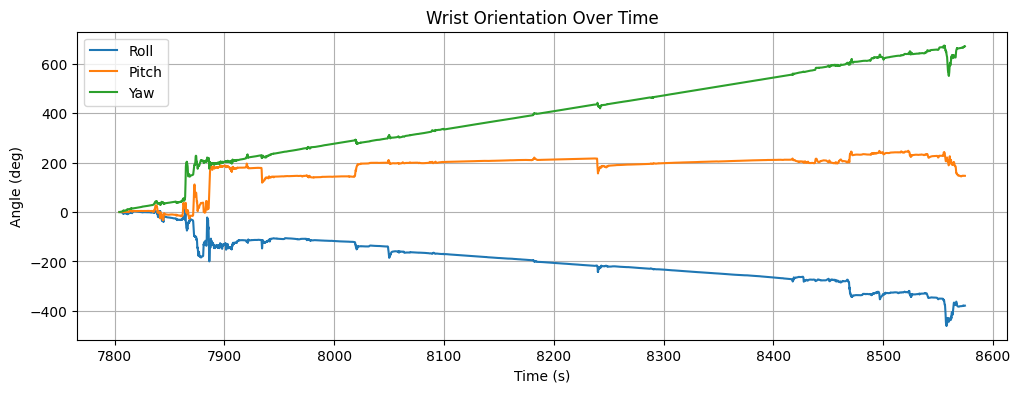

In [30]:

plt.figure(figsize=(12, 4))
plt.plot(df_gyro['timestamp'], df_gyro['roll'], label='Roll')
plt.plot(df_gyro['timestamp'], df_gyro['pitch'], label='Pitch')
plt.plot(df_gyro['timestamp'], df_gyro['yaw'], label='Yaw')
plt.title('Wrist Orientation Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.grid(True)
plt.show()

### Angular speed

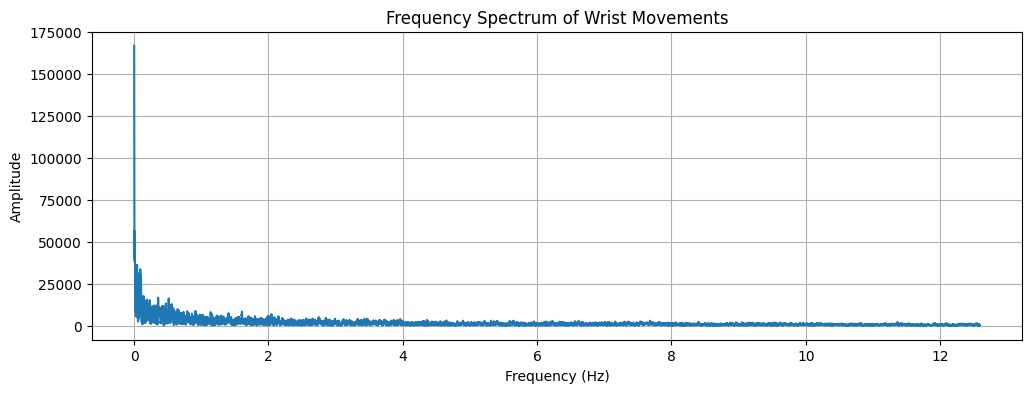

In [33]:
n = len(df_gyro)
dt = np.mean(np.diff(df_gyro['timestamp']))
freq = np.fft.fftfreq(n, d=dt)
spectrum = np.abs(np.fft.fft(df_gyro['angular_speed']))

plt.figure(figsize=(12, 4))
plt.plot(freq[:n//2], spectrum[:n//2])
plt.title("Frequency Spectrum of Wrist Movements")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
